In [1]:
#1.read the data
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv(r"Downloads\50_Startups.csv")

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#2.data preprocessing-i.missing values check
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [5]:
#ii.need of label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['State']=le.fit_transform(dataset['State'])

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [7]:
x=dataset.iloc[:,0:4].values
y=dataset.iloc[:,4:5].values

In [8]:
x.shape

(50, 4)

In [9]:
y.shape

(50, 1)

In [10]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
z=one.fit_transform(x[:,3:4]).toarray()
x=np.delete(x,3,axis=1)
x=np.concatenate((z,x),axis=1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
x.shape

(50, 6)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train.shape

(40, 6)

In [14]:
x_test.shape

(10, 6)

In [15]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#predicting the data
y_pred=mlr.predict(x_test)

In [17]:
y_pred

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230166],
       [ 67851.69209676],
       [ 98791.73374686],
       [113969.43533013],
       [167921.06569551]])

In [18]:
x_test

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 6.6051520e+04,
        1.8264556e+05, 1.1814820e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0067196e+05,
        9.1790610e+04, 2.4974455e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0191308e+05,
        1.1059411e+05, 2.2916095e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.7892920e+04,
        8.4710770e+04, 1.6447071e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 7.2107600e+04,
        1.2786455e+05, 3.5318381e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 2.0229590e+04,
        6.5947930e+04, 1.8526510e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.1136380e+04,
        1.5270192e+05, 8.8218230e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.3994560e+04,
        1.2278275e+05, 3.0331926e+05],
       [0.0000000e+00, 1.0000000e+00,

In [19]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

In [20]:
accuracy

0.9347068473282303

In [21]:
#double array
y=mlr.predict([[0,0,1,12345,12233445,123455]])

In [22]:
y

array([[459613.59521481]])

In [23]:
y[0][0]

459613.59521481337

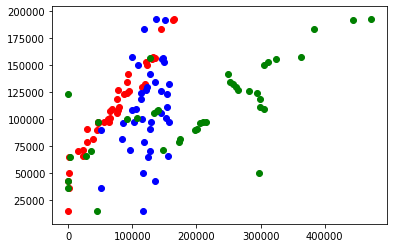

In [25]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,3],y_train[:,0],color="red")
plt.scatter(x_train[:,4],y_train[:,0],color="blue")
plt.scatter(x_train[:,5],y_train[:,0],color="green")

In [26]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)#we are asking it to split the based on certain range and the splitting od dataset should be same hence random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [27]:
ydtr=dtr.predict(x_test)

In [28]:
ydtr

array([101004.64, 141585.52, 141585.52,  78239.91, 182901.99, 107404.34,
        69758.98,  97427.84, 108733.99, 182901.99])

In [29]:
y_test

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94]])

In [30]:
accuracydtr=r2_score(y_test,ydtr)

In [31]:
accuracydtr#for multilinear it is 93 and for decision tree is 95

0.9594341740623319

In [34]:
from sklearn import tree
tree.export_graphviz(dtr)


'digraph Tree {\nnode [shape=box] ;\n0 [label="X[3] <= 75791.363\\nmse = 1637470908.557\\nsamples = 40\\nvalue = 109446.447"] ;\n1 [label="X[3] <= 26152.345\\nmse = 647928473.775\\nsamples = 21\\nvalue = 79233.588"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[3] <= 771.14\\nmse = 348868031.032\\nsamples = 8\\nvalue = 51723.646"] ;\n1 -> 2 ;\n3 [label="X[5] <= 22586.529\\nmse = 140587463.397\\nsamples = 3\\nvalue = 30971.513"] ;\n2 -> 3 ;\n4 [label="X[4] <= 93585.035\\nmse = 11855350.786\\nsamples = 2\\nvalue = 39116.57"] ;\n3 -> 4 ;\n5 [label="mse = 0.0\\nsamples = 1\\nvalue = 35673.41"] ;\n4 -> 5 ;\n6 [label="mse = -0.0\\nsamples = 1\\nvalue = 42559.73"] ;\n4 -> 6 ;\n7 [label="mse = 0.0\\nsamples = 1\\nvalue = 14681.4"] ;\n3 -> 7 ;\n8 [label="X[5] <= 222557.789\\nmse = 60411391.846\\nsamples = 5\\nvalue = 64174.926"] ;\n2 -> 8 ;\n9 [label="X[5] <= 31934.446\\nmse = 8131419.558\\nsamples = 4\\nvalue = 67845.97"] ;\n8 -> 9 ;\n10 [label="X[2] <= 0.5\\nms

In [35]:
from sklearn import tree
tree.export_graphviz(dtr)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ModuleNotFoundError: No module named 'pydotplus'

In [36]:
yd=dtr.predict([[1,0,0,12345,23456,6789]])

In [40]:
yd

array([65200.33])

In [41]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor(n_estimators=10,random_state=0)#<------This is an instance<------here we are giving random splits to the data set and apply decision tree for each and calculate accordingly
rdr.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [42]:
yrdr=rdr.predict(x_test)

In [43]:
accuracyran=r2_score(y_test,yrdr)

In [44]:
accuracyran

0.9658739721928109